In [1]:
import pandas as pd
import seaborn as sns

# Evaluation data

We have taken some training data to evaluate how well we are predicting games. Due to the nature of the elo rating system, it makes sense to take the latest games using the most up to date rating we are able to compute with the training data. Then we took all training data from 2020 but the 105 games are all rapid games, so we took the last 105 classic games from 2019 as well. All these games are included in the /data/eval folder as separate json files.

The option to give the evaluation data as a dataframe (eval_df) is also possible by putting the pickle file of the dataframe in a folder named /data/io. This file is also automatically generated when parsing the training data and splitting it for evaluation.

# Predictors
We will use four different approaches to compute the ratings as explained in the project approach.

# Predictor v1

Number of correct predictions = 107 from 210
Accuracy = 50.95238095238095


In [37]:
predictions = pd.read_pickle("../data/predictions/predictor_v1_val")
c_predictions = predictions.loc[predictions['time_control'] == 'classic']
r_predictions = predictions.loc[predictions['time_control'] == 'rapid']

In [38]:
predictions.head()

,game_date,probability,white_prob,black_prob,predicted,actual,time_control,correct
0,2019-12-28,0.508634,0.254181,0.246696,0.5,0.0,classic,False
1,2019-12-28,0.253087,0.270073,0.342246,0.0,0.5,classic,False
2,2019-12-28,0.543066,0.265957,0.299180,0.5,0.5,classic,True
3,2019-12-28,0.314940,0.218750,0.254630,0.0,0.0,classic,True
4,2019-12-28,0.276612,0.277419,0.268293,0.0,0.0,classic,True


In [39]:
c_predictions.correct.sum()

50

In [40]:
50/105

0.47619047619047616

In [41]:
r_predictions.correct.sum()

57

In [42]:
57/105

0.5428571428571428

In summary we are better predicting rapid games rather than classic ones.

In [43]:
wrong_predictions = predictions.loc[predictions['correct'] == False]

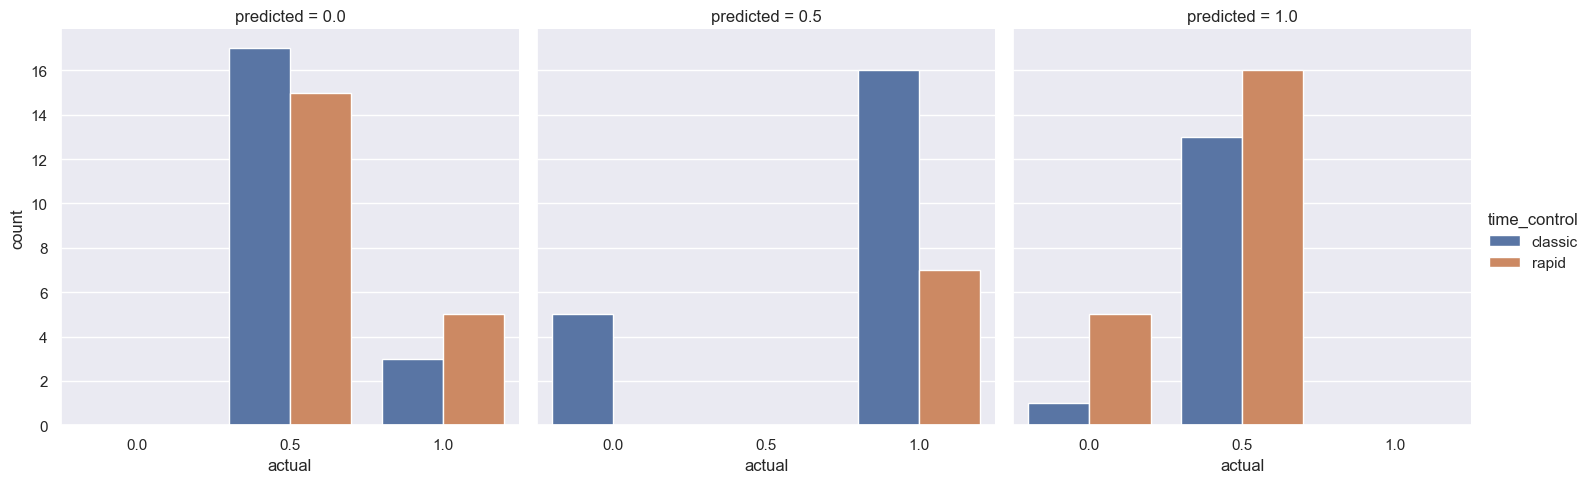

In [44]:
sns.set(style="darkgrid")
sns.catplot(x="actual", col="predicted", col_wrap=3, hue='time_control', data=wrong_predictions, kind='count')

We are predicting a lot of games that ended in draw as whether white (mistake more common in rapid games) or black won (mistake more common in classic games). Besides for classic games we are saying in many cases that the white player was going to win but it ended in draw. In conclusion our formula to predict draw needs some improvement.

# Predictor v2

Number of correct predictions = 89 from 210
Accuracy = 42.38095238095238

We are not improving the results from Predictor v1, so we discard this predictor.

# Predictor v3

Number of correct predictions = 107 from 210
Accuracy = 50.95238095238095


In [45]:
predictions = pd.read_pickle("../data/predictions/predictor_v3_val")
c_predictions = predictions.loc[predictions['time_control'] == 'classic']
r_predictions = predictions.loc[predictions['time_control'] == 'rapid']

In [46]:
predictions.head()

,game_date,probability,white_prob,black_prob,predicted,actual,time_control,correct
0,2019-12-28,0.267493,0.152709,0.178571,0.0,0.0,classic,True
1,2019-12-28,0.265243,0.189573,0.324658,0.0,0.5,classic,False
2,2019-12-28,0.395087,0.295886,0.343511,0.0,0.5,classic,False
3,2019-12-28,0.163957,0.210623,0.363478,0.0,0.0,classic,True
4,2019-12-28,0.319929,0.298507,0.382789,0.0,0.0,classic,True


In [47]:
c_predictions.correct.sum()

50

In [48]:
r_predictions.correct.sum()

57

In [49]:
wrong_predictions = predictions.loc[predictions['correct'] == False]

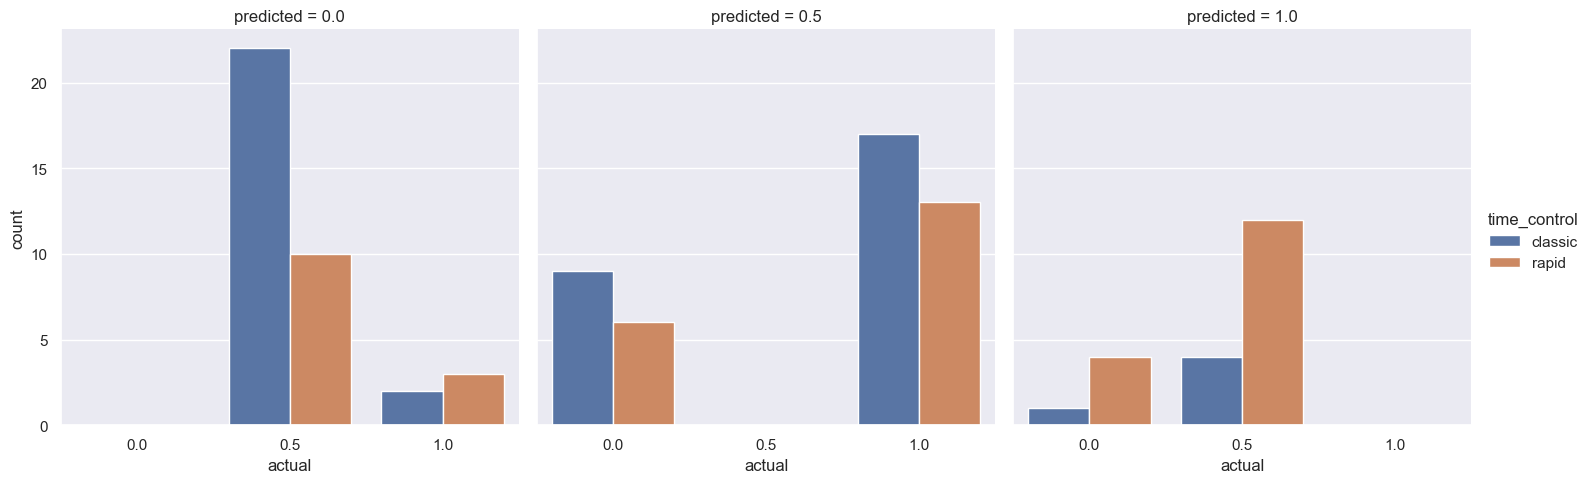

In [50]:
sns.catplot(x="actual", col="predicted", col_wrap=3, hue='time_control', data=wrong_predictions, kind='count')

The interpretation is that we are again missing draw cases where we are predicting that the black player is going to win (common for classic games) or the white one for rapid games.

# Predictor v4

Number of correct predictions = 111 from 210
Accuracy = 52.857142857142854

In [51]:
predictions = pd.read_pickle("../data/predictions/predictor_v4_val")
c_predictions = predictions.loc[predictions['time_control'] == 'classic']
r_predictions = predictions.loc[predictions['time_control'] == 'rapid']

In [52]:
c_predictions.correct.sum()

54

In [53]:
54/105

0.5142857142857142

In [54]:
r_predictions.correct.sum()

57

In [33]:
57/105

0.5428571428571428

The same as before, we are better predicting rapid games rather than classic ones.

In [55]:
wrong_predictions = predictions.loc[predictions['correct'] == False]

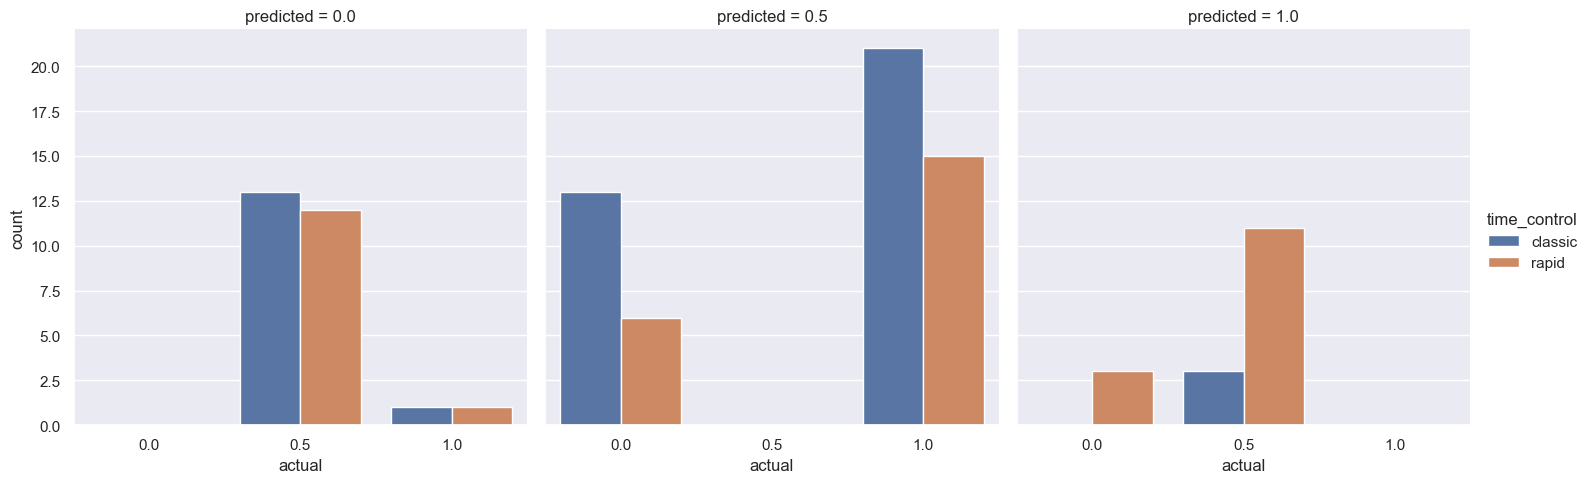

In [56]:
sns.catplot(x="actual", col="predicted", col_wrap=3, hue='time_control', data=wrong_predictions, kind='count')

The improvement with respect to predictor v3 is that we are saying more times that the game will be draw. Thus we increased also the number of errors predicting classic games as draw when indeed the white player won.

## Adjustment 1: give white player some advantage

We can adjust the probability computation based not only in the difference of the elo ratings of the players but in different draw ranges for each type of game. Besides a common practice in prediction algorithms is to give a little advantage to the white player, because in chess the white player starts the game.
Let's incorporate this little advantage on the formula of predictor v4:

elo_rating_diff = white_rating - black_rating

By adding some extra rating of 50:

elo_rating_diff = white_rating + 50 - black_rating

The results:

Number of correct predictions = 109 from 210
Accuracy = 51.904761904761905

We decreased the accuracy to it did not worked this idea

## Adjustment 2: Reduce a bit the draw probability range

Current range for classic:
[0.40, 0.65]

Current range for rapid:
[0.45, 0.55]

New ranges:

New range for classic:
[0.40, 0.60]

New range for rapid:
[0.45, 0.53]

The results:
    
Number of correct predictions = 104 from 210
Accuracy = 49.523809523809526

This adjustment did not work either. But let's try to change only for classic:

Number of correct predictions = 105 from 210
Accuracy = 50.0

So we discard this adjustment.

## Adjustment 3: Ratings correction factor
Adding a rating correction factor based on the analysis of the ratings done at the notebook "Analyzing_year_ratings".
For all ranges:

Results:
Number of correct predictions = 100 from 210
Accuracy = 47.61904761904762

Only for the underestimated ranges:
Number of correct predictions = 103 from 210
Accuracy = 49.04761904761905

So we are not improving the predictions with this correction factor for the evaluation dataset. This factor affects more to the predictions of rapid games rather than classic games. Why? Because it tries to adjust the ratings to make them more equal, those with lower ratings will get increased their ratings and those with a very high rating will get it decreased.

# Summary of the evaluation
We had four different approaches to generate ratings of players and we evaluated the four of them the same way computing the probability following the proposed logaritmic function as explained within the Project Approach notebook.

We choose the predictor version 4 with just one rating for each player, mixing both rapic and classic games, and using the weighted factor of the hill-climbing approach when updating the ratings.

We tried different adjustments for the selected approach in order to increase the accuracy of the predictions, but the three ideas did not improve the baseline.